# ***CREDIT CARD FRAUD DETECTION***

The aim of the project is to predict fraudulent credit card transactions using machine learning models. This is crucial from the bank’s as well as customer’s perspective. The banks cannot afford to lose their customers’ money to fraudsters. Every fraud is a loss to the bank as the bank is responsible for the fraud transactions.




# **The steps are broadly divided into below steps.**



1. Reading, understanding and visualising the data
2. Preparing the data for modelling
3. Building the model
4. Evaluate the model






In [1]:
# Importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 500)

In [3]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.xlsx to creditcard.xlsx


# **Reading and understanding the data**

In [4]:
df = pd.read_excel('creditcard.xlsx')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(5078, 31)

In [6]:
df.shape

(5078, 31)

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000
mean,26382.185112,-0.705344,0.584418,-0.103781,0.425607,-0.309467,-0.108354,-0.414131,0.001792,-0.201511,-0.598985,0.443141,-0.374414,-0.133082,-0.753740,0.180393,-0.506959,-0.725042,-0.304608,0.096463,0.072042,0.080747,-0.056018,-0.046341,0.011762,0.061805,-0.005513,0.047797,0.009149,73.191022,0.096889
std,52274.968414,2.863990,2.026708,3.356264,2.102100,2.234907,1.412898,2.988556,2.431636,1.411592,2.440459,1.677758,2.496983,0.944686,2.543313,0.913850,1.847433,2.988526,1.315915,0.902469,0.715884,1.452462,0.781524,0.624309,0.601170,0.477179,0.494488,0.561563,0.313161,215.785515,0.295835
min,0.000000,-30.552380,-15.732974,-31.103685,-4.657545,-32.092129,-7.465603,-43.557242,-41.044261,-13.434066,-24.588262,-2.789813,-18.683715,-3.389510,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-3.718810,-11.748689,-22.797604,-8.887017,-19.254328,-2.162523,-4.781606,-1.413802,-7.263482,-2.909294,0.000000,0.000000
25%,978.000000,-1.179498,-0.167130,-0.265157,-0.800510,-0.678437,-0.838720,-0.490238,-0.210276,-0.621899,-0.738014,-0.589780,-0.327536,-0.779209,-0.567735,-0.392509,-0.754356,-0.629875,-0.603295,-0.422913,-0.150422,-0.210077,-0.524702,-0.210538,-0.356086,-0.202714,-0.326615,-0.048946,-0.034215,2.000000,0.000000
50%,2098.500000,-0.462149,0.447474,0.628581,0.224502,-0.106695,-0.292258,0.087072,0.041295,-0.047356,-0.197572,0.119421,0.200544,-0.117226,-0.052802,0.275321,-0.131226,-0.205362,-0.114726,0.066185,0.004411,-0.032411,-0.046677,-0.057917,0.079595,0.083491,-0.018332,0.033595,0.020627,13.990000,0.000000
75%,3321.750000,1.082291,1.037522,1.291780,1.185083,0.433680,0.374438,0.603359,0.370945,0.564727,0.244455,1.120876,0.674271,0.527086,0.310869,0.856801,0.389534,0.252811,0.313698,0.586069,0.196866,0.150978,0.414131,0.093009,0.425758,0.354262,0.285234,0.230862,0.099971,62.812500,0.000000
max,170348.000000,2.355634,22.057729,4.017561,12.114672,11.095089,21.393069,34.303177,20.007208,6.450992,11.906868,12.018913,3.774837,3.182541,4.197010,3.635042,4.087802,6.739384,3.790316,5.228342,11.059004,27.202839,8.361985,5.466230,3.114882,2.208209,3.463246,3.852046,4.850490,7712.430000,1.000000


# **Handling Missing Values**

In [8]:
# Checking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
Time,0.0
V1,0.0
V2,0.0
V3,0.0
V4,0.0
V5,0.0
V6,0.0
V7,0.0
V8,0.0
V9,0.0


No Null Values found so no problem

# **Checking the distribution of the classes**

In [9]:
#checking for fraud(1) and non fraud(0) data
classes = df['Class'].value_counts()
classes

,count
Class,
0,4586
1,492


In [10]:
#percentage share of non_fraud(0) data
normal_share = round((classes[0]/df['Class'].count()*100),2)
normal_share

np.float64(90.31)

In [11]:
#percentage share of fraud(1) data
fraud_share = round((classes[1]/df['Class'].count()*100),2)
fraud_share

np.float64(9.69)

We are having about 9.69% frauds

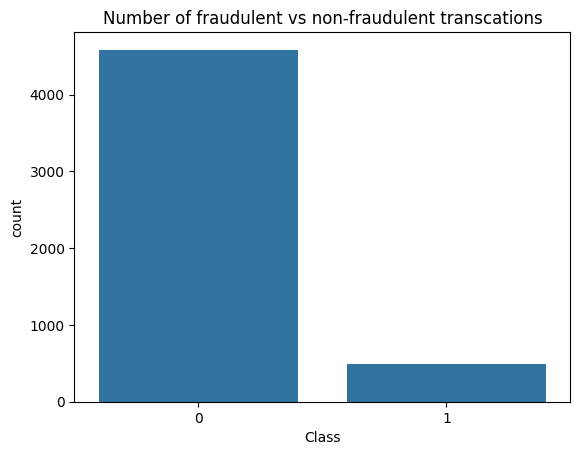

In [12]:
# Bar plot for the number of fraudulent vs non-fraudulent transcations
sns.countplot(x='Class', data=df)
plt.title('Number of fraudulent vs non-fraudulent transcations')
plt.show()

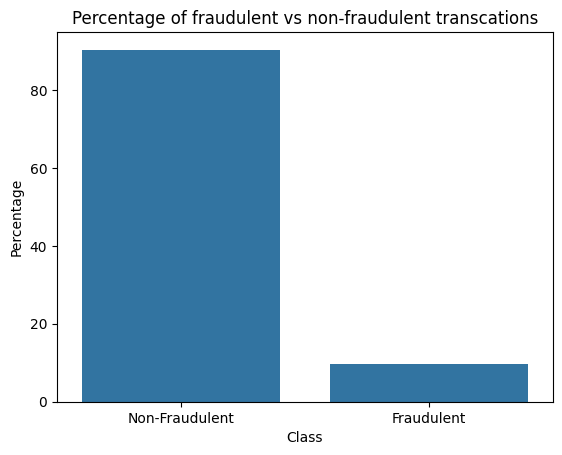

In [13]:
# Bar plot for the percentage of fraudulent vs non-fraudulent transcations
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]}
df_fraud_percentage = pd.DataFrame(fraud_percentage)
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')
plt.show()

# **observe the distribution of classes with amount**

In [14]:
# Creating fraudulent dataframe
data_fraud = df[df['Class'] == 1]
# Creating non fraudulent dataframe
data_non_fraud = df[df['Class'] == 0]

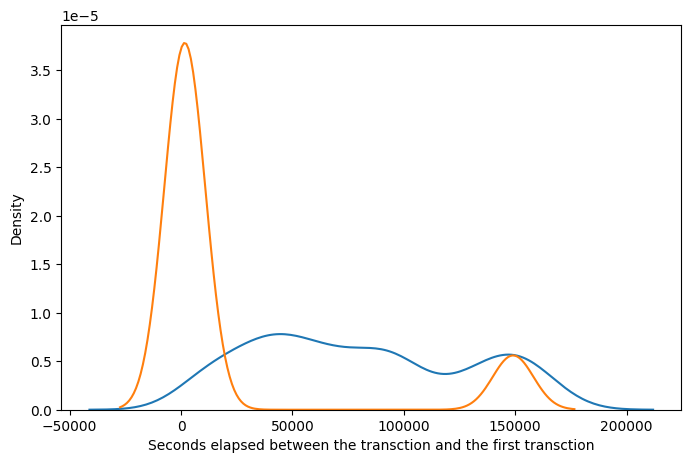

In [15]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()

# **Analysis**
We do not see any specific pattern for the fraudulent and non-fraudulent transctions with respect to Time. Hence, we can drop the Time column.

In [16]:
# Dropping the Time column
df.drop('Time', axis=1, inplace=True)

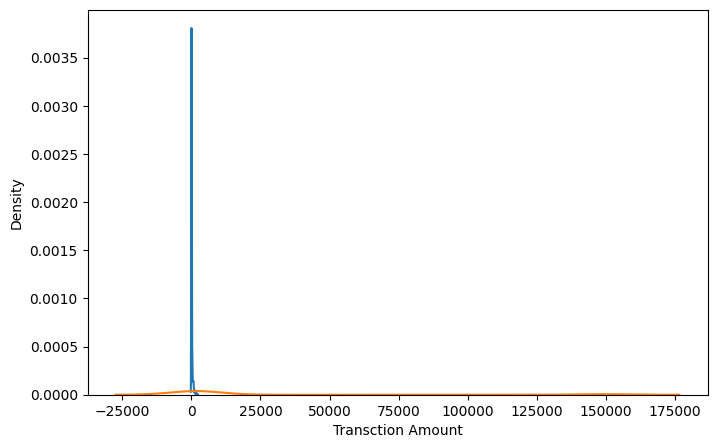

In [17]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Amount'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Transction Amount')
plt.show()

# **Analysis**:
Most of the fraud transactions happen with smaller amounts of money, while the non-fraud ones happen with both small and large amounts.

# **Train Test Split**

In [ ]:
# Import library
from sklearn.model_selection import train_test_split

In [ ]:
# Putting feature variables into X
X = df.drop(['Class'], axis=1)

In [ ]:
# Putting target variable to y
y = df['Class']

In [ ]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

# **Feature Scaling**
We need to scale only the Amount column as all other columns are already scaled by the PCA transformation.

In [ ]:
# Standardization method
from sklearn.preprocessing import StandardScaler

# Instantiate the Scaler
scaler = StandardScaler()

# Fit the data into scaler and transform
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
2599,1.268826,-0.075080,0.080660,-0.075044,-0.399847,-0.669932,-0.121500,-0.046256,0.054380,0.091901,0.952024,0.195648,-0.909923,0.632742,0.460970,0.521465,-0.609946,0.378786,0.347341,-0.100851,0.106338,0.260472,-0.146120,0.082359,0.446028,1.153666,-0.100013,-0.016147,-0.281865
362,-2.564961,2.470985,2.649417,-1.564256,1.794297,-0.614742,4.185906,-3.855359,5.436633,8.737458,1.682963,-1.309536,-0.052481,-4.890716,1.608141,-1.666078,-2.435921,-1.169402,-0.428482,3.564138,-1.672706,-0.463149,-0.532466,0.306494,0.226844,-0.365416,-0.936735,-2.733887,-0.280089
1480,1.150559,0.217028,0.503593,1.066363,-0.461525,-0.745174,0.041322,-0.021768,-0.132318,0.175510,1.383222,0.544142,-0.989829,0.754240,0.315134,0.308993,-0.560494,0.206396,-0.063033,-0.167924,-0.111975,-0.421642,0.057032,0.475331,0.380089,-0.580347,0.007138,0.018426,-0.247049
3864,-0.708339,0.686952,0.949903,-2.297918,0.483874,-0.271797,0.852773,0.037838,0.873245,-0.739589,1.699544,0.682008,-1.121865,0.418733,0.789255,-0.960546,-0.222109,-0.288738,-0.561492,0.057694,0.130312,0.813245,-0.226855,-0.306755,-0.079594,-0.790542,0.367995,0.027745,-0.321610
3938,-0.478569,0.610831,1.914069,1.254405,0.282959,0.261539,0.608015,0.064353,-0.414138,0.062622,1.136418,0.111544,-1.587309,0.307789,-0.282589,-1.102855,0.451085,-0.107839,1.011995,0.058807,0.002931,0.267760,-0.200448,0.203390,0.003847,-0.245289,-0.033436,-0.120065,-0.240965



Scaling the test set

We don't fit scaler on the test set. We only transform the test set.

# **Preparing the Data for Modelling**

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Scale the Amount column
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])

# Features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


In [19]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (3554, 29)
X_test shape: (1524, 29)
y_train shape: (3554,)
y_test shape: (1524,)


In [20]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
4311,-1.784653,-2.435945,-0.482580,-2.119973,2.422986,-0.316425,-0.265659,0.142718,-0.657565,0.806155,0.668344,-0.975030,-1.324939,0.166560,-0.141882,0.601387,0.064454,-1.649468,-0.770224,-0.088764,0.534120,1.966764,1.033619,-1.639198,-0.637944,-0.086711,0.283211,0.106635,-0.130749
377,-0.586190,0.490033,0.564065,-1.228364,2.860178,3.363731,0.263669,0.703249,-0.648518,-0.338281,-0.088266,-0.392282,-0.095892,0.134684,1.140451,0.416863,-0.942987,0.096660,0.513916,0.241503,-0.295026,-0.965887,-0.207535,0.989880,0.257821,0.114458,-0.159428,-0.158921,-0.330041
3965,0.816969,-0.280175,1.354064,2.859548,-0.792255,0.723782,-0.662957,0.298866,1.372479,0.267158,1.135857,-2.567767,0.150292,1.535292,-1.530794,0.976111,0.037681,0.894612,-0.668478,0.023558,-0.133302,-0.433181,-0.111095,-0.108651,0.181549,-0.089374,-0.026460,0.038635,0.360203
1292,-0.556704,0.239968,0.754325,-1.024342,0.617849,0.560902,0.161715,0.111242,-1.790760,0.492548,1.042804,-0.008772,0.831598,-0.022110,1.512106,-1.069230,1.905180,-3.510029,-0.228956,0.030810,0.493641,1.495781,-0.061486,-0.563574,-0.537784,-0.016190,-0.060091,0.181052,-0.292871
1173,1.200428,-0.489236,-0.736384,-0.690662,-0.135711,-0.481853,-0.074583,-0.137785,-1.448472,0.367059,1.725652,0.088374,0.457217,-0.736109,0.062216,1.038738,1.019906,-0.993011,0.485911,0.294498,0.302955,0.646307,-0.311563,-0.310429,0.736109,-0.017777,-0.015942,0.022911,0.142790


# **Building the Model**

**Logistic Regression** (quick and interpretable):

In [21]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', random_state=42)

** Random Forest **(better performance for nonlinear data):

In [22]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

# **Model Evaluation**

For Logistic Regression

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict using Logistic Regression model
y_pred_log = model.predict(X_test)

# Confusion matrix
print("Confusion Matrix (Logistic Regression):")
print(confusion_matrix(y_test, y_pred_log))

# Classification report
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_log))

# Accuracy
print("Accuracy Score (Logistic Regression):", accuracy_score(y_test, y_pred_log))


Confusion Matrix (Logistic Regression):
[[1376    0]
 [  26  122]]

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1376
           1       1.00      0.82      0.90       148

    accuracy                           0.98      1524
   macro avg       0.99      0.91      0.95      1524
weighted avg       0.98      0.98      0.98      1524

Accuracy Score (Logistic Regression): 0.9829396325459318


For Random Forest

In [24]:
# Train again using Random Forest if needed
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(class_weight='balanced', random_state=42)
model_rf.fit(X_train, y_train)

# Predict
y_pred_rf = model_rf.predict(X_test)

# Confusion Matrix
print("\nConfusion Matrix (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))

# Classification Report
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

# Accuracy
print("Accuracy Score (Random Forest):", accuracy_score(y_test, y_pred_rf))



Confusion Matrix (Random Forest):
[[1376    0]
 [  26  122]]

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1376
           1       1.00      0.82      0.90       148

    accuracy                           0.98      1524
   macro avg       0.99      0.91      0.95      1524
weighted avg       0.98      0.98      0.98      1524

Accuracy Score (Random Forest): 0.9829396325459318


After training and evaluating both Logistic Regression and Random Forest Classifier, **I observed that both models achieved the same** **accuracy of 98.29%.**

However, **I have preferred Logistic Regression** for this problem because:

1.**It is simpler to implement and interpret.**

2.**It requires less computational power.**

3.**It performs equally well in this case compared to Random Forest.**